In [1]:
!pip3 install plotly-express
!pip3 install nbformat==4.2.0
!pip install plotly

In [1]:
!pip install --upgrade jupyterhub
!pip install --upgrade --user nbconvert

     |████████████████████████████████| 3.7 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 210 kB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 6.7 MB/s eta 0:00:011
     |████████████████████████████████| 109 kB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 142 kB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 561 kB 1.4 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.


In [1]:
!pip install -U nbformat

     |████████████████████████████████| 74 kB 976 kB/s eta 0:00:01
  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0


In [ ]:
!sudo pip install --upgrade "ipython[all]"

In [2]:
!pip install nbconvert

In [3]:
import pandas as pd 
import numpy as np 
import pickle 

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 
import plotly 
import plotly_express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 
from plotly.offline import init_notebook_mode 
init_notebook_mode(connected = True)

In [4]:
data = pd.read_csv('covid_19_data.csv')

# Сделаем предобработку данных

In [5]:
data.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [6]:
data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [8]:
data.shape

(306429, 8)

In [10]:
data.dropna(axis=0, inplace = True)

In [11]:
data.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [12]:
data.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [13]:
data['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'China',
       'Canada', 'Australia', 'Germany', 'Others', 'Israel', 'Lebanon',
       'Iraq', 'Austria', 'France', 'UK', 'Denmark', 'Netherlands',
       'Italy', 'Spain', 'Brazil', 'Mexico', 'Chile', 'Japan', 'Colombia',
       'Peru', 'Russia', 'Ukraine', 'Sweden', 'India', 'Pakistan',
       'Belgium'], dtype=object)

In [14]:
data['Country/Region'].value_counts()

Russia            30129
US                26740
Japan             17932
Mainland China    15758
India             13050
Colombia          12419
Mexico            12199
Brazil            10144
Ukraine            9801
Peru               9542
Italy              8001
Spain              7615
Sweden             7539
Canada             6960
UK                 6553
Germany            6481
Chile              6375
Netherlands        5864
France             4544
Australia          3785
Pakistan           2478
Belgium            2388
Denmark             893
Hong Kong           494
Macau               494
Taiwan               49
China                48
Others               46
Israel                5
Austria               1
Iraq                  1
Lebanon               1
Name: Country/Region, dtype: int64

In [15]:
data['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Unknown', 'Chicago', 'Illinois', 'California', 'Arizona',
       'Ontario', 'New South Wales', 'Victoria', 'British Columbia',
       'Bavaria', 'Queensland', 'Chicago, IL', 'South Australia',
       'Boston, MA', 'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA',
       'Seattle, WA', 'Tempe, AZ', 'San Benito, CA', 'Toronto, ON',
       'London, ON', 'Madison, WI', 'Cruise Ship',
       'Diamond Princess cruise ship', 'San Diego County, CA',
       'San Antonio, TX', 'Ashland, NE', 'Travis, CA',
       'From Diamond Princess', 'Lackland, TX', 'None',
   

# Обрезка

In [16]:
data.groupby('Province/State')['Deaths', 'Recovered', 'Confirmed'].agg(sum).sort_values('Deaths',ascending=False)

/var/folders/nx/y2kh_1nd66g4yk33821_z5g40000gn/T/ipykernel_21035/3636355880.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Deaths    Recovered    Confirmed
Province/State                                            
England               24042130.0          0.0  666227518.0
Sao Paulo             17339593.0  444187689.0  521308945.0
New York              15531696.0          0.0  380636880.0
Maharashtra           14980930.0  597480809.0  681186928.0
California            10831870.0         40.0  696898013.0
...                          ...          ...          ...
Fairfax County, VA           0.0          0.0          4.0
San Antonio, TX              0.0          0.0         26.0
San Benito, CA               0.0          0.0         72.0
San Diego County, CA         0.0         18.0         59.0
 Montreal, QC                0.0          0.0         17.0

[737 rows x 3 columns]

In [17]:
data.groupby('Country/Region')['Deaths','Recovered','Confirmed'].agg(sum).sort_values('Deaths',ascending=False)

/var/folders/nx/y2kh_1nd66g4yk33821_z5g40000gn/T/ipykernel_21035/1247198336.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Deaths     Recovered     Confirmed
Country/Region                                         
US              123303762.0  5.033710e+08  6.049146e+09
Brazil           72339029.0  2.311993e+09  2.649295e+09
India            44256013.0  2.898258e+09  3.221090e+09
Mexico           42918161.0  3.612402e+08  4.595573e+08
UK               27316263.0  2.323781e+06  7.705376e+08
Italy            24852224.0  4.851544e+08  6.277543e+08
Russia           18271229.0  7.883275e+08  9.211500e+08
Spain            18124340.0  5.727280e+07  6.401320e+08
Colombia         13962927.0  4.686380e+08  5.148170e+08
Germany          13150115.0  4.493167e+08  5.174361e+08
Peru             13119233.0  3.227364e+08  3.584896e+08
Ukraine           6209502.0  2.342478e+08  3.102261e+08
Chile             5707664.0  2.166768e+08  2.315812e+08
Canada            5692896.0  1.715769e+08  1.934975e+08
Belgium           4219275.0  0.000000e+00  1.547341e+08
Netherlands       3616057.0  3.295280e+06  2.304008e+08
Pakistan          3489065.0  1.453124e+08  1.632456e+08
Sweden            3167242.0  0.000000e+00  1.407718e+08
Mainland China    2089872.0  3.689744e+07  4.082260e+07
Japan             1555677.0  7.805405e+07  8.866606e+07
Australia          268435.0  7.219933e+06  9.447430e+06
France             157809.0  9.383745e+06  1.918464e+07
Hong Kong           45325.0  2.433578e+06  2.655935e+06
Others                189.0  5.003000e+03  2.622800e+04
Denmark               186.0  1.929090e+05  2.122260e+05
Taiwan                 24.0  1.890000e+02  1.104000e+03
Macau                   0.0  1.913000e+04  2.060500e+04
Lebanon                 0.0  0.000000e+00  1.000000e+00
Austria                 0.0  0.000000e+00  2.000000e+00
Israel                  0.0  0.000000e+00  5.000000e+00
Iraq                    0.0  0.000000e+00  0.000000e+00
China                   0.0  0.000000e+00  0.000000e+00

In [18]:
df = data.groupby(['Country/Region','Province/State'])['Deaths','Recovered','Confirmed'].sum()
df

/var/folders/nx/y2kh_1nd66g4yk33821_z5g40000gn/T/ipykernel_21035/3291202551.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Deaths   Recovered   Confirmed
Country/Region Province/State                                                
Australia      Australian Capital Territory    1257.0     46149.0     49155.0
               Diamond Princess cruise ship       0.0         0.0         0.0
               External territories               0.0         0.0         0.0
               From Diamond Princess              0.0         0.0        55.0
               Jervis Bay Territory               0.0         0.0         0.0
...                                               ...         ...         ...
Ukraine        Vinnytsia Oblast              171216.0   6263458.0   8681010.0
               Volyn Oblast                  156312.0   7626312.0   9069952.0
               Zakarpattia Oblast            230741.0   7122527.0   9291556.0
               Zaporizhia Oblast             225346.0  10256628.0  13858457.0
               Zhytomyr Oblast               206047.0   9317372.0  11740027.0

[762 rows x 3 columns]

In [19]:
df_1 = data.groupby(['Country/Region', 'Province/State', 'Deaths', 'Confirmed', 'Recovered'])['ObservationDate', 'Last Update'].sum()
df_1

/var/folders/nx/y2kh_1nd66g4yk33821_z5g40000gn/T/ipykernel_21035/3887038785.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



ObservationDate  \
Country/Region Province/State               Deaths Confirmed Recovered                                   
Australia      Australian Capital Territory 0.0    1.0       0.0        03/13/202003/14/202003/15/2020   
                                                   2.0       0.0                  03/16/202003/17/2020   
                                                   3.0       0.0                            03/18/2020   
                                                   4.0       0.0                            03/19/2020   
                                                   6.0       0.0                            03/20/2020   
...                                                                                                ...   
Ukraine        Zhytomyr Oblast              1724.0 87225.0   82158.0                        05/25/2021   
                                            1730.0 87279.0   82818.0                        05/26/2021   
                                            1733.0 87399.0   83258.0                        05/27/2021   
                                            1734.0 87473.0   83575.0                        05/28/2021   
                                            1738.0 87550.0   83790.0                        05/29/2021   

                                                                                                              Last Update  
Country/Region Province/State               Deaths Confirmed Recovered                                                     
Australia      Australian Capital Territory 0.0    1.0       0.0        2020-03-11T20:00:002020-03-14T01:53:032020-03-...  
                                                   2.0       0.0                   2020-03-16T14:38:462020-03-16T14:38:46  
                                                   3.0       0.0                                      2020-03-18T11:53:04  
                                                   4.0       0.0                                      2020-03-19T11:13:54  
                                                   6.0       0.0                                      2020-03-20T21:13:30  
...                                                                                                                   ...  
Ukraine        Zhytomyr Oblast              1724.0 87225.0   82158.0                                  2021-05-26 04:20:35  
                                            1730.0 87279.0   82818.0                                  2021-05-27 04:20:59  
                                            1733.0 87399.0   83258.0                                  2021-05-28 04:20:36  
                                            1734.0 87473.0   83575.0                                  2021-05-29 04:20:41  
                                            1738.0 87550.0   83790.0                                  2021-05-30 04:20:55  

[186123 rows x 2 columns]

# Рисунки

<AxesSubplot:xlabel='ObservationDate'>

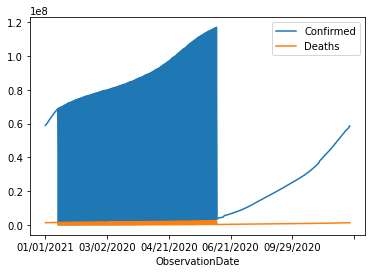

In [20]:
data[['Confirmed', 'Deaths', 'ObservationDate']].groupby('ObservationDate').sum().plot()

Text(0, 0.5, 'Количество заболевших')

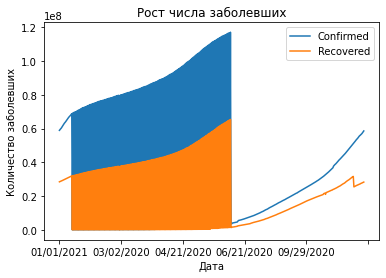

In [21]:
ax = data[['Confirmed',
          'Recovered',
          'ObservationDate']].groupby('ObservationDate').sum().plot(title = 'Рост числа заболевших')
ax.set_xlabel("Дата")
ax.set_ylabel('Количество заболевших')

Наиболее 20 пострадавших стран

In [22]:
#20 по количеству подтвержденных случаев
df_top = data[data['ObservationDate'] == max(data.ObservationDate)]
df_top = df_top.groupby('Country/Region', as_index=False)['Confirmed'].sum()
df_top = df_top.nlargest(20, 'Confirmed')

In [23]:
#Тренд по времени 
df_trend = data.groupby(['ObservationDate','Country/Region'], as_index=False)['Confirmed'].sum()
df_trend = df_trend.merge(df_top, on='Country/Region')
df_trend.rename(columns={'Country/Region' : 'Countries', 
                         'Confirmed_x':'Cases',
                         'ObservationDate' : 'Dates'}, 
                inplace=True)

In [24]:
px.line(df_trend, 
       title = 'Рост числа заболевших COVID-19',
       x = 'Dates',
       y = 'Cases',
       color = 'Countries')

Прологарифмируем - должно выглядеть приятней

In [25]:
#Логарфмирование 
df_trend['ln(Cases)'] = np.log(df_trend['Cases']+1)

In [26]:
px.line(df_trend, 
       x = 'Dates',
       y = 'ln(Cases)',
       color = 'Countries',
       title = 'Логарифм роста численности случаев COVID-19')

Видно, что приблизительно с определенного времени во всем мире число выявленных случаев COVID-19 монотонно убывает

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
df_mortality = data.query( 'Confirmed > 100') 
df_mortality['mortality'] = df_mortality['Deaths'] / df_mortality['Confirmed']
df_mortality['mortality'] = df_mortality['mortality'].apply(lambda x: round(x, 3))
df_mortality.sort_values('mortality', ascending=False, inplace=True)
df_mortality.drop_duplicates(subset=['Country/Region'], keep='first', inplace=True)

fig = px.bar(df_mortality[:20].iloc[::-1],
             x='mortality', 
             y='Country/Region',
             labels={'mortality': 'Уровень смертности', 'Country_Region': 'Страна'},
             title=f'Уровень смертности в топ-20 стран', 
             text='mortality', 
             height=800, 
             orientation='h')
fig.show()

Уровень смертности в топ-20 странах как отношение смертей к общему числу выявленных случаев заболеваний. Можно интерпретировать как количество смертей (в людях) на заболевшего (в людях)

<AxesSubplot:>

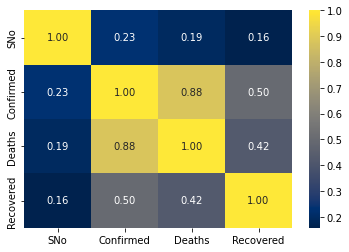

In [35]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='cividis')

Посмотрим на зависимость. Вполне обоснованно, что число выявленных случаев сильно коррелирует со смертностью. Но, как говорится, correletaion doesnt mean the causion

Построим диаграмму рассеивания

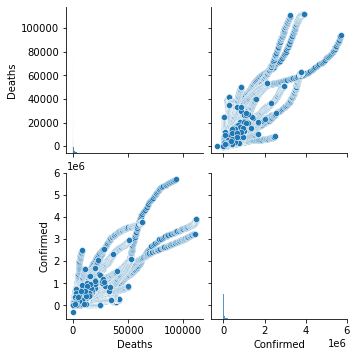

In [37]:
sns_plot = sns.pairplot(data[['Deaths', 'Confirmed']])

Из построенного графика видно, что, чем больше число выявленных случаев заболеваний, тем больше смертность. Что вполне обоснованно. 

Сводная таблица для топ-20 стран

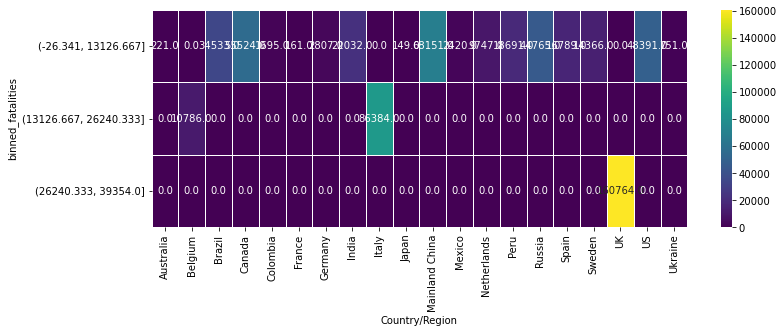

In [39]:
plt.figure(figsize=(12, 4))
df_new = df_mortality.iloc[:20]
df_new['Confirmed'] = df_new['Confirmed'].astype(np.int)
df_new['binned_fatalities'] = pd.cut(df_new['Deaths'], 3)
platform_genre_sales = df_new.pivot_table(
                        index='binned_fatalities', 
                        columns='Country/Region', 
                        values='Confirmed', 
                        aggfunc=sum).fillna(int(0)).applymap(np.int)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.7, cmap="viridis");

In [47]:
with open('countries_codes.pkl', 'rb') as file:
    countries_codes = pickle.load(file)
    
    
df_map = data.copy()
df_map['ObservationDate'] = data['ObservationDate'].astype(str)
df_map = df_map.groupby(['ObservationDate','Country/Region'], as_index=False)['Confirmed','Deaths'].sum()
df_map['iso_alpha'] = df_map['Country/Region'].map(countries_codes)
df_map['ln(Confirmed)'] = np.log(df_map.Confirmed + 1)
df_map['ln(Deaths)'] = np.log(df_map.Deaths + 1) #чтобы в ноль не обвалилось

px.choropleth(df_map, 
              locations="iso_alpha", 
              color="ln(Confirmed)", 
              hover_name="Country/Region",
              hover_data=["Confirmed"],
              animation_frame="ObservationDate",
              color_continuous_scale=px.colors.sequential.OrRd,
              title = 'Общее число в мире выявленных случаев COVID-19 с корректировкой на логарифм')